In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [114]:
df = pd.read_csv("csv/salary_data.csv")
X = df.to_numpy()
# X[:,1]/=20000
n = X.shape[0]
np.random.shuffle(X)
n = X.shape[0]
train = X[:int(0.7*n)]
train = train[train[:,0].argsort()]
trainY = train[:,1]
train = train[:,0]
test = X[int(0.7*n):]
test = test[test[:,0].argsort()]
testY = test[:,1]
test = test[:,0]
print(train.shape)

(21,)


In [115]:
def mDim(X, m):
    n = X.shape[0]
    X = np.vstack((np.ones(n),X)).T
    for i in range(2,m+1):
        X=np.c_[X,X[:,-1]*X[:,1]]
    return X

In [116]:
def cost(labels, predicted):
    return np.linalg.norm(labels-predicted)/predicted.shape[0]


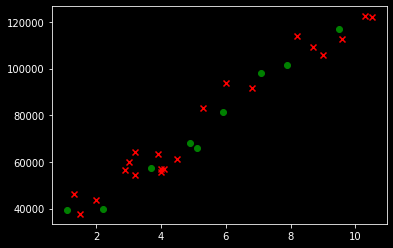

In [117]:
# plotting the data
x = mDim(train,1)
xtest = mDim(test,1)
fig1 = plt.figure()
ax = fig1.add_subplot()
ax.scatter(x[:,1],trainY, marker = 'x', color='red')
ax.scatter(xtest[:,1],testY,marker = 'o', color='green')

plt.show()

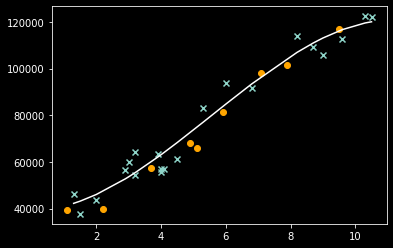

[39463.51698934  -295.25263096  2039.04678627  -121.93137703]
1516.2810305618054


In [118]:
# least squares
m=3
x= mDim(train,m)
B = ( np.linalg.inv(x.T@x)@x.T@trainY )
fig2 = plt.figure()
ax = fig2.add_subplot()
ax.scatter(x[:,1],trainY, marker='x')
ax.scatter(test, testY, marker='o', color='orange')
ax.plot(x[:,1], x@B, color='white')
plt.show()
print(B)
print(cost(testY,mDim(test,m)@B))


(21, 4) (21, 4) (21,)
[1222.67011323 2567.10471485 4160.18620308 -328.73695971]


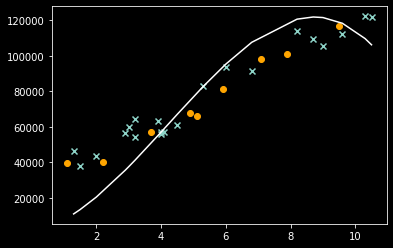

5106.303150646855


In [119]:
m = 3
# B = np.zeros(m+1)
B = 4*(np.random.rand(m+1)-0.5)
# B = np.hstack((B, np.zeros(m)))
x = mDim(train,m)
n = x.shape[0]
gamma = 4000
a = 0
print(x.shape, x.shape, trainY.shape)
for i in range(100000):
    grad = 2*(x.T@(x@B-trainY))
    norm = np.linalg.norm(grad)
    a += norm
    grad/=a
    B-=gamma*grad
    if norm<1e-5:
        break 
print(B)
fig3 = plt.figure()
ax = fig3.add_subplot()
ax.scatter(x[:,1],trainY, marker='x')
ax.scatter(test, testY, marker='o', color='orange')
ax.plot(x[:,1], x@B, color='white')
plt.show()

print(cost(testY,mDim(test,m)@B))